# Exploring the TMDb Movie Dataset
## by Sunny Paul

## Preliminary Wrangling

> For my project, I have chosen to work with the TMDb Movies dataset. This is a large dataset that stores information about most popular (and also less popular) movies such as popularity, budget, revenue, user votes and much more. The exact information provided by this dataset will be shown in more detail in the next section.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> Let's load the dataset and print some of its rows to get a sense of what it does look like:

In [2]:
# Loading the csv file into a Pandas dataframe
tmdb_df = pd.read_csv("./tmdb-movies.csv")

# printing out some rows of the dataframe
tmdb_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### What is the structure of your dataset?


To answer this question, let me first print out some basic information about the variables of this dataset:

In [3]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

We notice that the dataset has 20 columns (excluding the 'id' column). Some of these columns are numerical and others are categorical, let's explore some categorical variables:

In [4]:
# number of unique values in the 
len(pd.unique(tmdb_df['vote_average']))

72

There are 72 different values of movie ratings, let's see how these values look like:

In [5]:
pd.unique(tmdb_df['vote_average'])

array([6.5, 7.1, 6.3, 7.5, 7.3, 7.2, 5.8, 7.6, 8. , 6.2, 5.2, 7.4, 6.1,
       7. , 6.8, 5.3, 7.8, 6.4, 6.6, 7.7, 5.6, 6.9, 5.9, 6.7, 5.5, 5. ,
       4.4, 5.4, 5.1, 4.8, 5.7, 4.1, 3.9, 4.5, 6. , 4.2, 3.6, 4.3, 4.9,
       4.7, 4. , 3.5, 3.8, 3.3, 3.7, 4.6, 7.9, 8.2, 2.6, 3.1, 8.9, 3.2,
       2.4, 8.4, 3. , 2.8, 3.4, 8.8, 8.1, 8.3, 2.7, 2.5, 2.1, 8.6, 2.9,
       8.5, 9.2, 2.2, 2. , 8.7, 2.3, 1.5])

In [6]:
# number of unique values in the 
len(pd.unique(tmdb_df['genres']))

2040

That seems a lot. Is it possible to have 2040 different genres? if we take a look at the dataset printout above, we notice that the genre columns contains combination of individual genres, so we need to do some cleaning before counting the real number of unique genres. Same for production companies:

In [7]:
len(pd.unique(tmdb_df['production_companies']))

7446

### What is/are the main feature(s) of interest in your dataset?

In this project, I will be interesting to investigate the following questions that sound interesting to me:

- How a movie's revenue affects  it rating?

- How a movie's budget affects it rating?

- Is there any correlation between a movie's budget and its revenue?

- Do popular movies have higher ratings?

- The relationship between budget, revenue and popularity

- The relationship between budget, revenue and rating

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The mean features in the dataset that would help me answer my questions are:

- **popularity:** This is a measure of a movie's popularity.

- **vote count:** The number of votes a given movie has received.

- **vote average:** This is the average rating of a given movie.

- **budget_adj:** This is the adjusted budget of a given movie. This takes into account the inflation factor of currency.

- **revenue_adj:** This is the adjusted revenue of a given movie. This takes into account the inflation factor of currency.


## Univariate Exploration

Let's start by dropping all of the columns that I am not going to use:

In [8]:
# a list of columns to drop
drop_col = ['id', 'budget', 'revenue', 
            'original_title', 'cast', 'homepage', 
            'tagline', 'keywords', 'overview', 
            'director', 'runtime', 'release_date',
            'imdb_id', 'production_companies', 'release_year']

# dropping the columns
tmdb_df = tmdb_df.drop(drop_col, axis = 1)

In [9]:
# Print a sample 
tmdb_df.head(20)

,popularity,genres,vote_count,vote_average,budget_adj,revenue_adj
0,32.985763,Action|Adventure|Science Fiction|Thriller,5562,6.5,1.379999e+08,1.392446e+09
1,28.419936,Action|Adventure|Science Fiction|Thriller,6185,7.1,1.379999e+08,3.481613e+08
2,13.112507,Adventure|Science Fiction|Thriller,2480,6.3,1.012000e+08,2.716190e+08
3,11.173104,Action|Adventure|Science Fiction|Fantasy,5292,7.5,1.839999e+08,1.902723e+09
4,9.335014,Action|Crime|Thriller,2947,7.3,1.747999e+08,1.385749e+09
5,9.110700,Western|Drama|Adventure|Thriller,3929,7.2,1.241999e+08,4.903142e+08
6,8.654359,Science Fiction|Action|Thriller|Adventure,2598,5.8,1.425999e+08,4.053551e+08
7,7.667400,Drama|Adventure|Science Fiction,4572,7.6,9.935996e+07,5.477497e+08
8,7.404165,Family|Animation|Adventure|Comedy,2893,6.5,6.807997e+07,1.064192e+09
9,6.326804,Comedy|Animation|Family,3935,8.0,1.609999e+08,7.854116e+08


Let's print a again a description of the variables of interest:

In [10]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 6 columns):
popularity      10866 non-null float64
genres          10843 non-null object
vote_count      10866 non-null int64
vote_average    10866 non-null float64
budget_adj      10866 non-null float64
revenue_adj     10866 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 509.4+ KB


We notice that there are some null values in the 'imdb_id', 'genres', 'production_companies' variables. Let's remove the rows where at least one of these variables has a null value:

In [11]:
# drop rows containing null values
tmdb_df = tmdb_df.dropna(axis = 0)

Let's now check out if the null values are dropped:

In [12]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 6 columns):
popularity      10843 non-null float64
genres          10843 non-null object
vote_count      10843 non-null int64
vote_average    10843 non-null float64
budget_adj      10843 non-null float64
revenue_adj     10843 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 593.0+ KB


Great! the dataframe no more contains null values. I am ready to start exploring individual variable:

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

#### 1- popularity

Let's check out the distribution of the 'popularity' variable:

In [13]:
tmdb_df.popularity.describe(percentiles= [.05, .5, .90])

count    10843.000000
mean         0.647456
std          1.000986
min          0.000065
5%           0.064319
50%          0.384555
90%          1.352335
max         32.985763
Name: popularity, dtype: float64

It is clear that this is a continuous numerical variable. Let's draw a histogram:

/home/alan/.conda/envs/ds/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


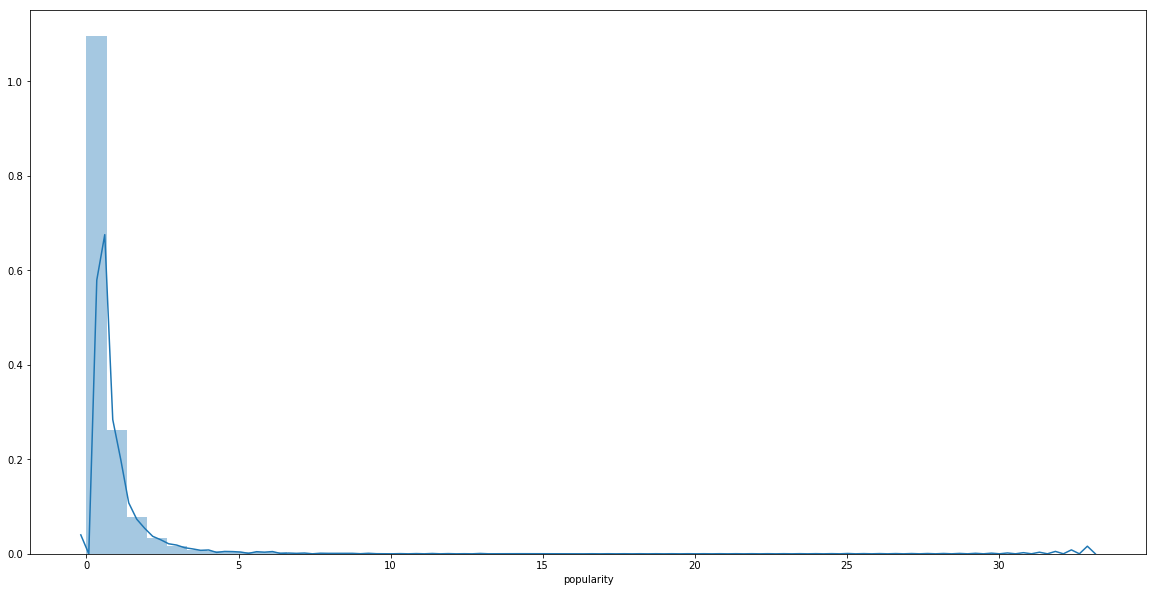

In [14]:
plt.figure(figsize=(20,10))
sns.distplot(tmdb_df.popularity)

It is clear that there are some outliers in the 'popularity' variable. The 90% quantile has a value of 1.43 while the maximum value is 32.99. In the following, I will set all values greater than the 95% quantile to the value of the 95% quantile:

In [15]:
# get the 95% quantile of the popularity variable
pop_90 = tmdb_df.popularity.quantile(q = 0.90)

# replace outliers with the 90% quantile value:
tmdb_df.popularity[tmdb_df.popularity > pop_90] = pop_90

/home/alan/.conda/envs/ds/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


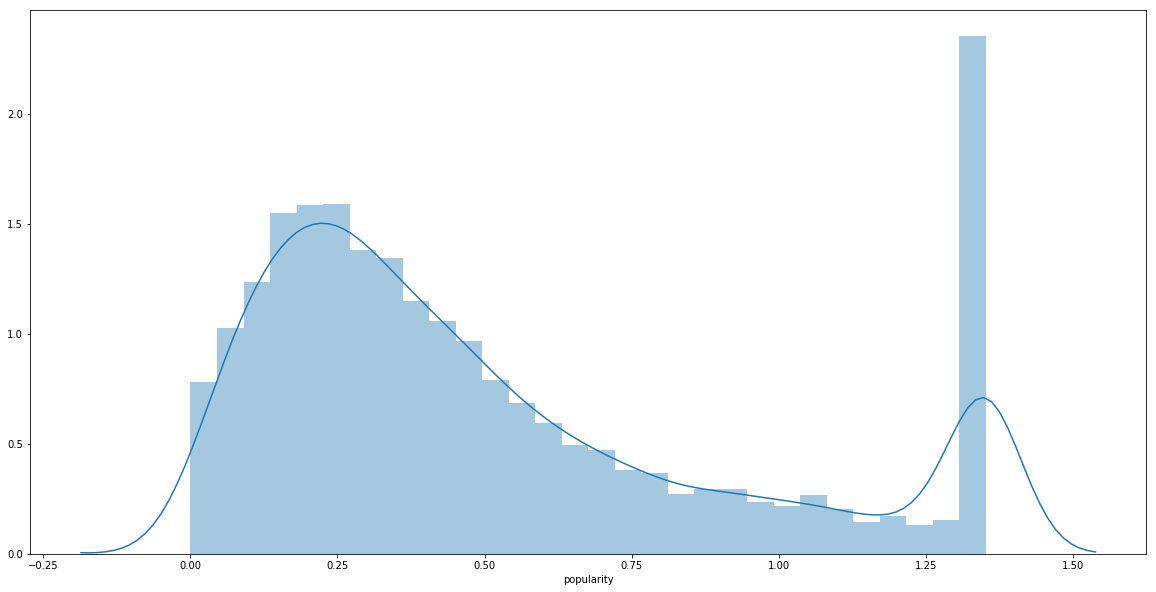

In [16]:
plt.figure(figsize=(20,10))
sns.distplot(tmdb_df.popularity)

After this cleaning procedure, we get right-skewed histgram of popularity values with a peak to the right caused by the value replacement I have performed. I am satisfied with this result so let's move to the next variable:

#### 2- vote count

Let's check out the distribution of the 'popularity' variable:

In [17]:
tmdb_df.vote_count.describe(percentiles= [.1, .5, .95])

count    10843.000000
mean       217.813705
std        576.155351
min         10.000000
10%         12.000000
50%         38.000000
95%       1027.000000
max       9767.000000
Name: vote_count, dtype: float64

Great, it seems that all movies in the dataset has at least 10 votes. Let's check out the histogram:

/home/alan/.conda/envs/ds/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


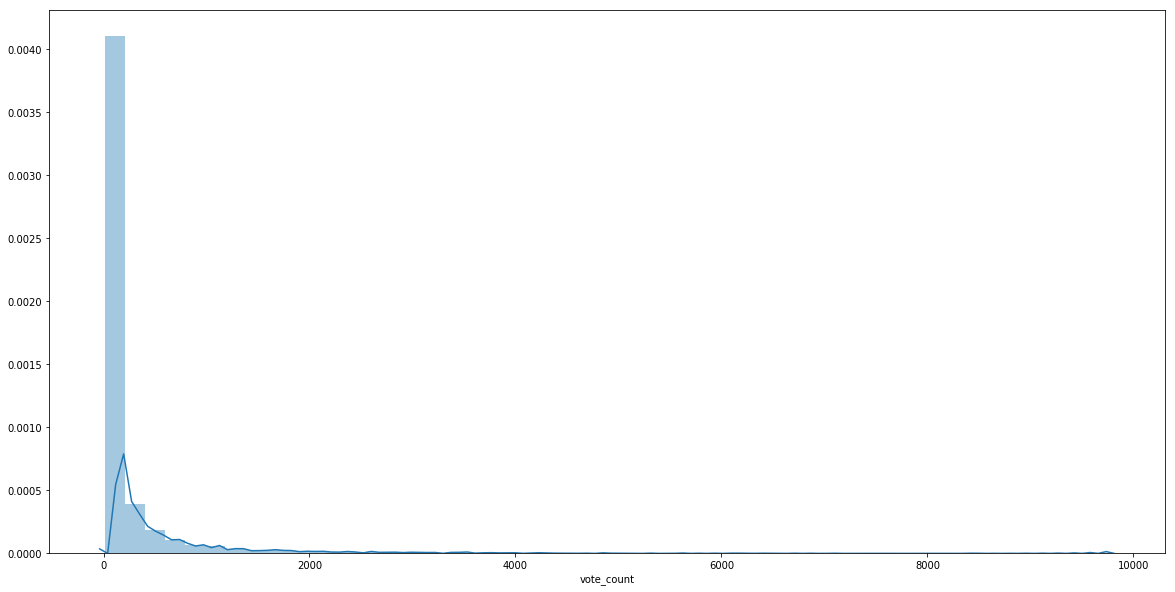

In [18]:
plt.figure(figsize=(20,10))
sns.distplot(tmdb_df.vote_count)

the histogram is right skewed. Some movies have an exceptionally high number of votes. We might think that we shouldn't be comparing moving with low number of votes with those with high ones. This is a view point. In this analysis, since all movies has at least 10 vote, I will take all of these movies into account regardless of the vote count. Let's now move to the next variable:

#### 3- vote average

In [19]:
tmdb_df.vote_average.describe(percentiles= [.25, .5, .75])

count    10843.000000
mean         5.973974
std          0.934260
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

We have seen before that this seems like a categorigal ordinal variable. It also seems that we have no outliers. Here is a second check:

/home/suny/.conda/envs/ds/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


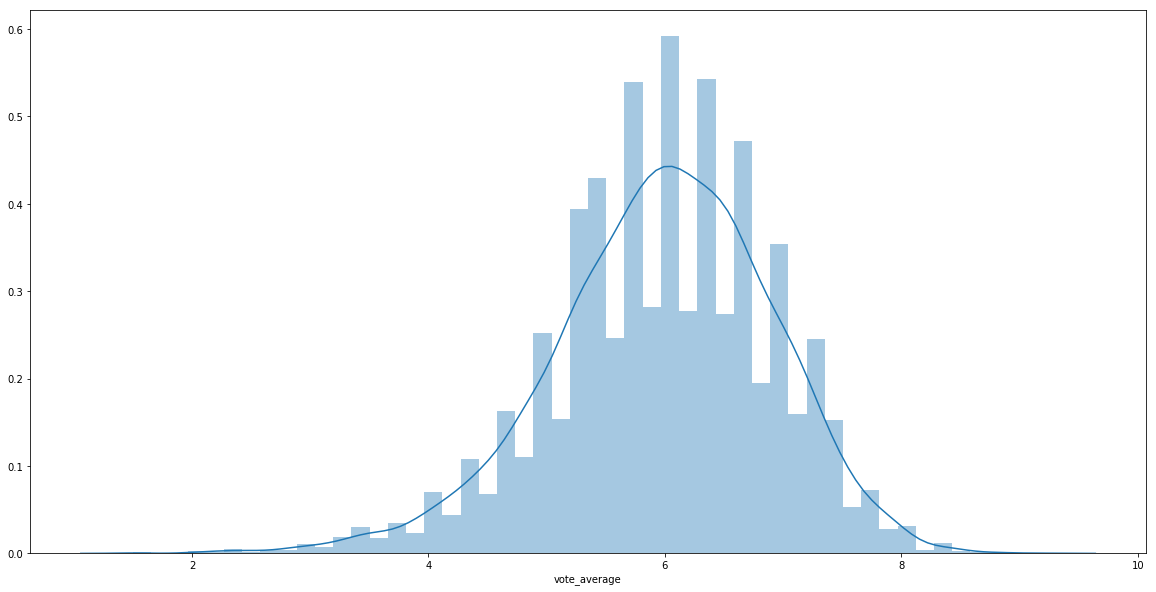

In [20]:
plt.figure(figsize=(20,10))
sns.distplot(tmdb_df.vote_average)

It seems that we have normal distribution here. In order to get a better handle on evaluating movie ratings, I will create a new categorical variable called 'rating'. This variable will have a value of 'low' if the vote average of a movie is lower than the 25% quantile, and 'high' if a movie's vote average is higher than the 75th quantile, and 'medium' between them:

In [21]:
# get the 25th quantile
vote_av_25 = tmdb_df.vote_average.quantile(q = 0.25)

# get the 75th quantile
vote_av_75 = tmdb_df.vote_average.quantile(q = 0.75)

# create the category labels
tmdb_df['rating'] = pd.cut(x = tmdb_df.vote_average, bins = [0, vote_av_25, vote_av_75, 10], labels = ['low', 'medium', 'high'])

# drop the vote_count and the vote_average columns
tmdb_df = tmdb_df.drop(['vote_average', 'vote_count'], axis = 1)

Let's print again a sample of the dataframe:

In [22]:
tmdb_df.head()

,popularity,genres,budget_adj,revenue_adj,rating
0,1.352335,Action|Adventure|Science Fiction|Thriller,1.379999e+08,1.392446e+09,medium
1,1.352335,Action|Adventure|Science Fiction|Thriller,1.379999e+08,3.481613e+08,high
2,1.352335,Adventure|Science Fiction|Thriller,1.012000e+08,2.716190e+08,medium
3,1.352335,Action|Adventure|Science Fiction|Fantasy,1.839999e+08,1.902723e+09,high
4,1.352335,Action|Crime|Thriller,1.747999e+08,1.385749e+09,high


We notice that the 'rating' variable is added successfully!

#### 5- budget_adj

Again, let's check out some statistics of the 'budget_adj' variable:

In [23]:
tmdb_df.budget_adj.describe()

count    1.084300e+04
mean     1.758827e+07
std      3.433299e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.093530e+07
max      4.250000e+08
Name: budget_adj, dtype: float64

It seems that many movies has 0 budget which does not make sense. This actually indicates a missing value for the budget variable. So I will drop all rows with a 0 budget. But let's first plot a histogram of budget values:

/home/alan/.conda/envs/ds/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


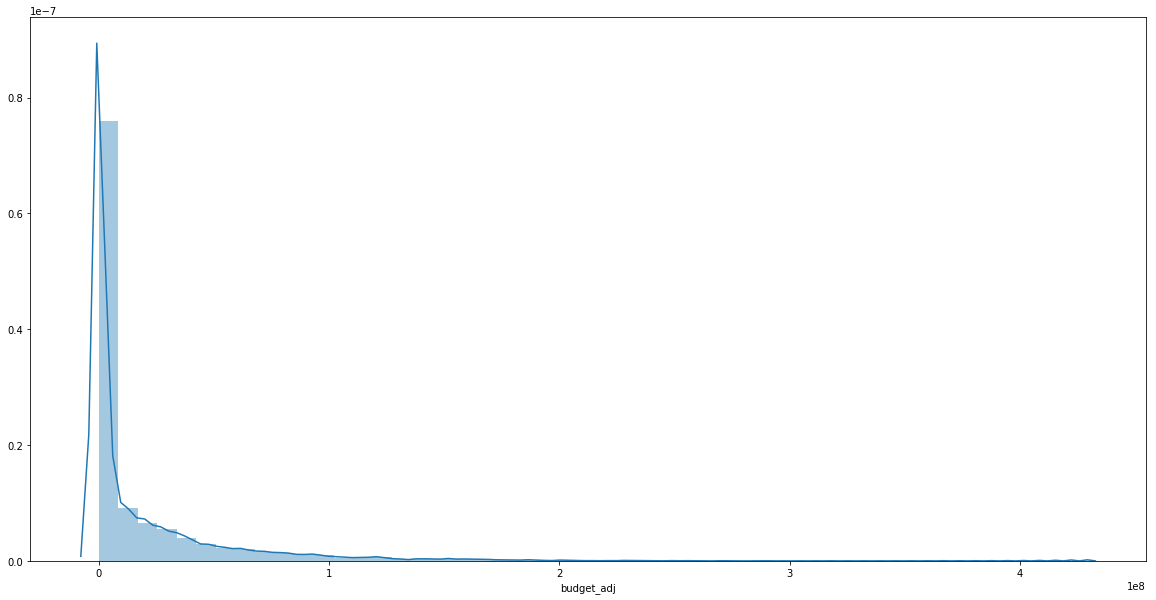

In [24]:
plt.figure(figsize=(20,10))
sns.distplot(tmdb_df.budget_adj)

In [25]:
# remove the rows where the budget is 0
tmdb_df = tmdb_df[tmdb_df.budget_adj != 0]

Make sure the 0 values were removed:

In [26]:
tmdb_df.budget_adj.describe()

count    5.169000e+03
mean     3.689487e+07
std      4.195793e+07
min      9.210911e-01
25%      8.102293e+06
50%      2.273036e+07
75%      5.008384e+07
max      4.250000e+08
Name: budget_adj, dtype: float64

Let's check the histogram again:

/home/alan/.conda/envs/ds/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


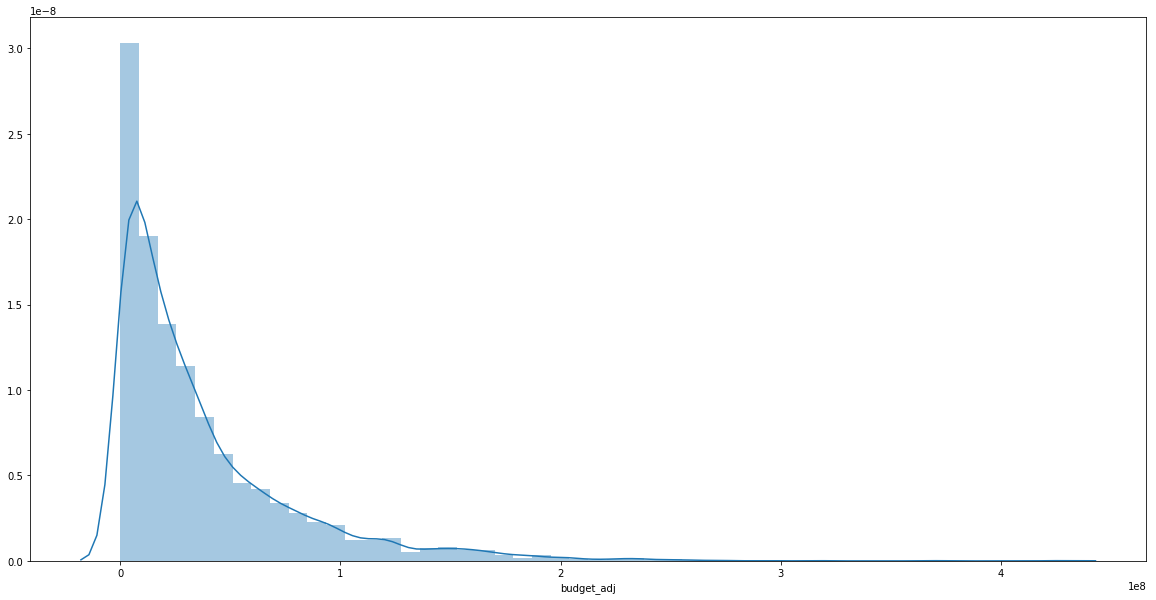

In [27]:
plt.figure(figsize=(20,10))
sns.distplot(tmdb_df.budget_adj)

So we notice that there are more movies with low budgets than those with higher budgets.

#### 5- revenue_adj

let's check some revenue statistics:

In [28]:
tmdb_df.revenue_adj.describe()

count    5.169000e+03
mean     1.021955e+08
std      1.959193e+08
min      0.000000e+00
25%      0.000000e+00
50%      2.863167e+07
75%      1.134196e+08
max      2.827124e+09
Name: revenue_adj, dtype: float64

The minimum revenue is 0, this might make sense as in the case of a movie with no revenue. Let's first check if this is frequent in the dataset:

/home/alan/.conda/envs/ds/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


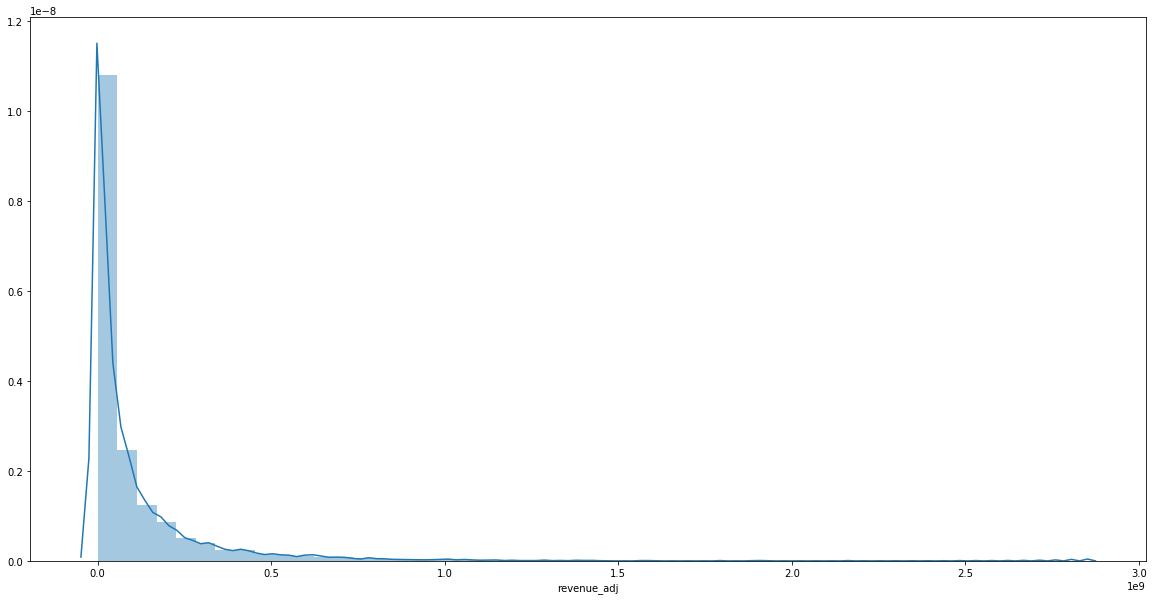

In [29]:
plt.figure(figsize = (20, 10))
sns.distplot(tmdb_df.revenue_adj)

It seems that low values are frequent. I will remove all those rows corresponding to 0 revenue:

In [30]:
# remove the rows where the revenue is 0
tmdb_df = tmdb_df[tmdb_df.revenue_adj != 0]

Let's again check the number of rows after removing the above rows:

In [31]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3855 entries, 0 to 10848
Data columns (total 5 columns):
popularity     3855 non-null float64
genres         3855 non-null object
budget_adj     3855 non-null float64
revenue_adj    3855 non-null float64
rating         3855 non-null category
dtypes: category(1), float64(3), object(1)
memory usage: 154.5+ KB


So we have 3809 rows left. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

So from the above section, we notice that no unusual distributions were found. There was just some null values that I needed to remove, and 0 values for budget and revenue that I needed to remove too. Some outlier values in the 'popularity' variable were also adjusted, and a new categorical variable called 'rating' was created using the 'vote_average' variable. We are now ready to bivariate explorations.

## Bivariate Exploration

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

#### How a movie's revenue affects  it rating?

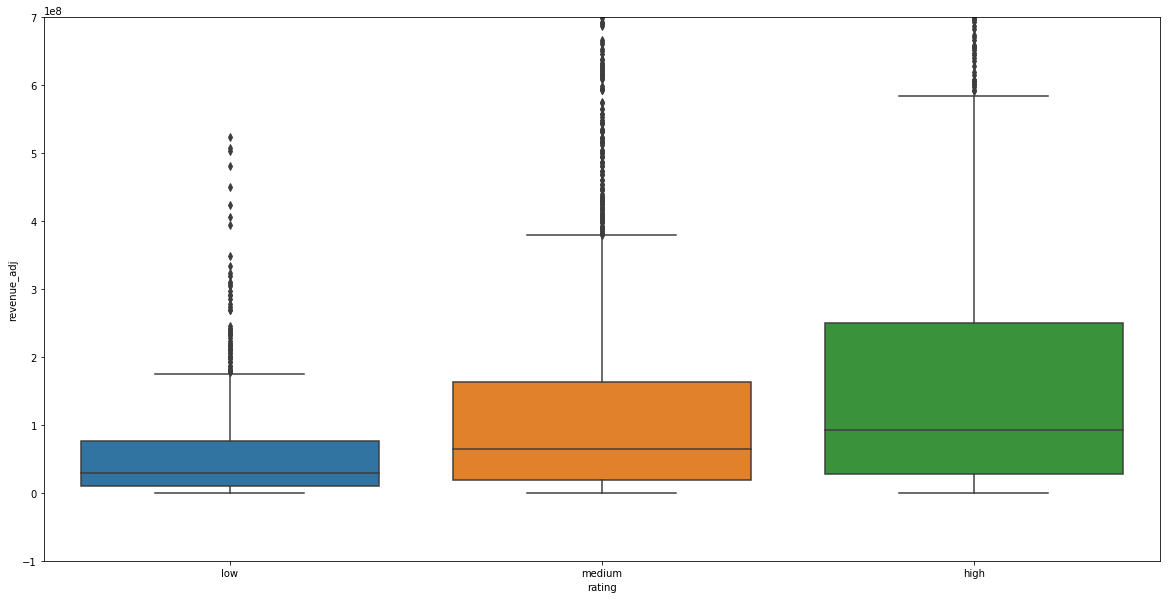

In [32]:
plt.figure(figsize = (20, 10))

# set the limits of the y axis
plt.ylim(-0.1e9, 0.7e9)

# plot the boxplot
sns.boxplot(x = 'rating', y =  'revenue_adj', data = tmdb_df)

From the boxplot above, we clearly notice that as the rating increases, the 25th, 50th and 75th quantiles of the revenue increase. This is quite interesting.

#### How a movie's budget affects  it rating?

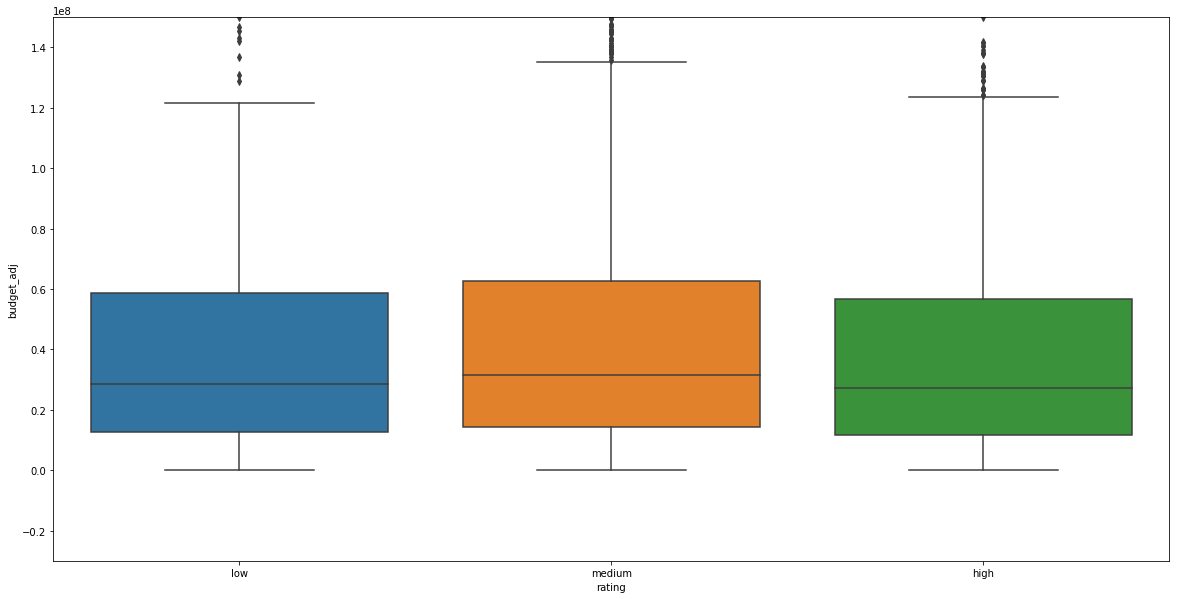

In [33]:
plt.figure(figsize = (20, 10))

# set the limits of the y axis
plt.ylim(-0.3e8, 1.5e8)

# plot the boxplot
sns.boxplot(x = 'rating', y =  'budget_adj', data = tmdb_df)

Wow, it seems the a movie's budget is not correlated to its rating. A good movie idea get's a good rating regardless of how high its budget is. This result is intriguing, it makes me think of exploring the relationship between a movies budget and its revenue.

#### Is there any correlation between a movie's budget and its revenue?



In order to explore this question, let's draw a scatter plot between budget and revenue:

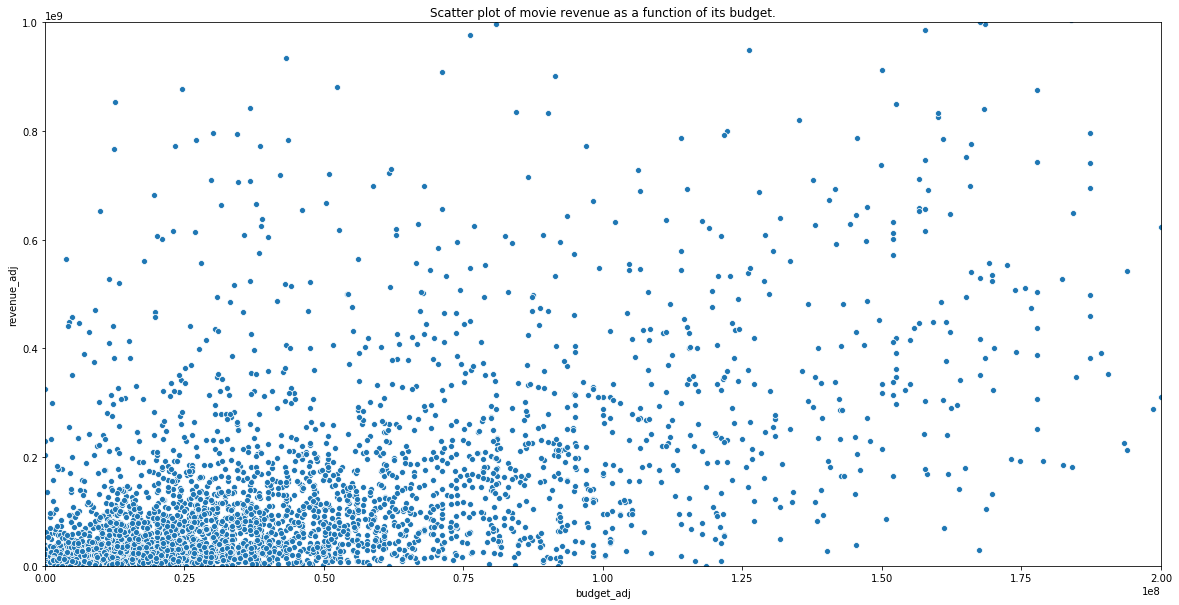

In [34]:
plt.figure(figsize = (20, 10))

# create the scatter plot
ax = sns.scatterplot(x = 'budget_adj', y = 'revenue_adj', data = tmdb_df)

# set some aesthetic parameters
ax.set_title("Scatter plot of movie revenue as a function of its budget.")
ax.set_xlim(0,2e8)
ax.set_ylim(0,1e9)

plt.show()

as expected, there is a very week correlatioin between a movie's budget and its revenue. So interesting!

#### Do popular movies have higher ratings?

(-0.05, 1.6)

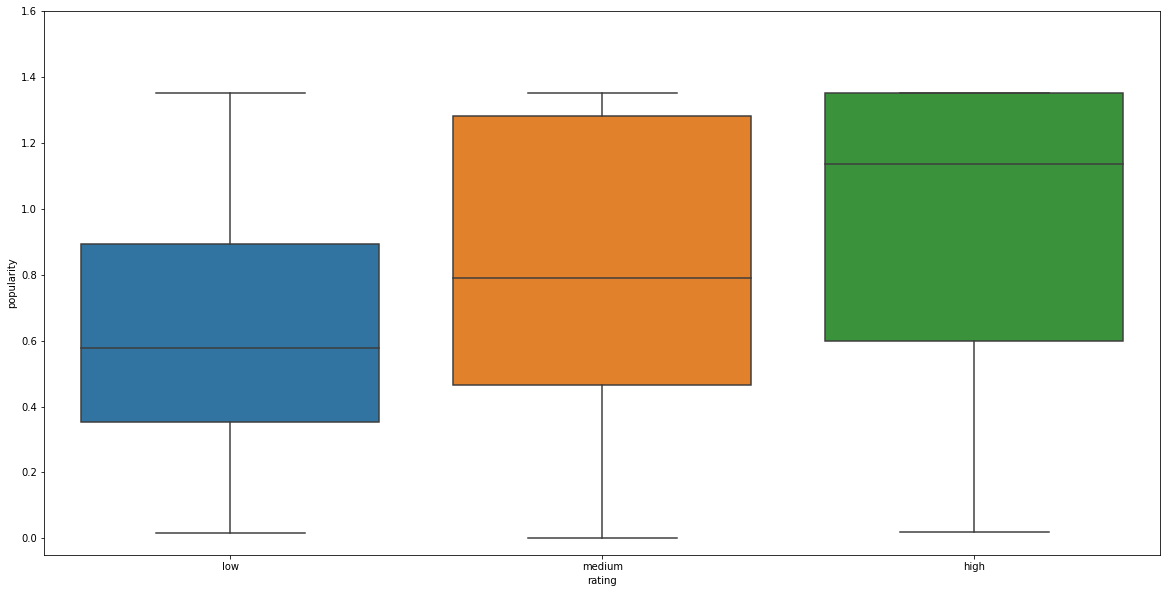

In [35]:
plt.figure(figsize = (20, 10))

# create the scatter plot
ax = sns.boxplot(x = 'rating', y = 'popularity', data = tmdb_df)

# set some aesthetic parameters
ax.set_ylim(-0.05,1.6)

We notice that more popular movies do actually have higher rating. This makes sense!

## Multivariate Exploration

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

#### The relationship between budget, revenue and popularity

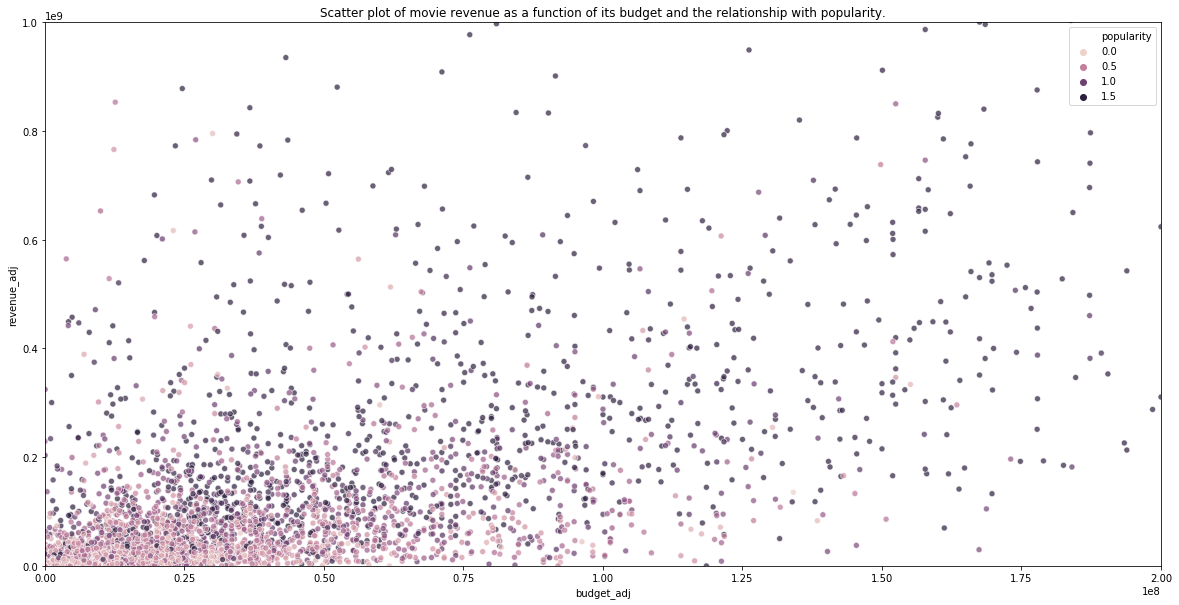

In [36]:
plt.figure(figsize = (20, 10))

# create the scatter plot
ax = sns.scatterplot(x = 'budget_adj', y = 'revenue_adj', hue = 'popularity', alpha = 0.7,
                     data = tmdb_df)

# set some aesthetic parameters
ax.set_title("Scatter plot of movie revenue as a function of its budget and the relationship with popularity.")
ax.set_xlim(0,2e8)
ax.set_ylim(0,1e9)

plt.show()

We notice from the above figure that there is some positive correlation between revenue and popularity. On the other hand, the correlation between popularity and budget is very weak.

This makes sense sense more popular movies might get more cinema visite and sell more tickets. However, the budget does not affect popularity since small movie producers are capable of producing great movies too.

#### The relationship between budget, revenue and rating

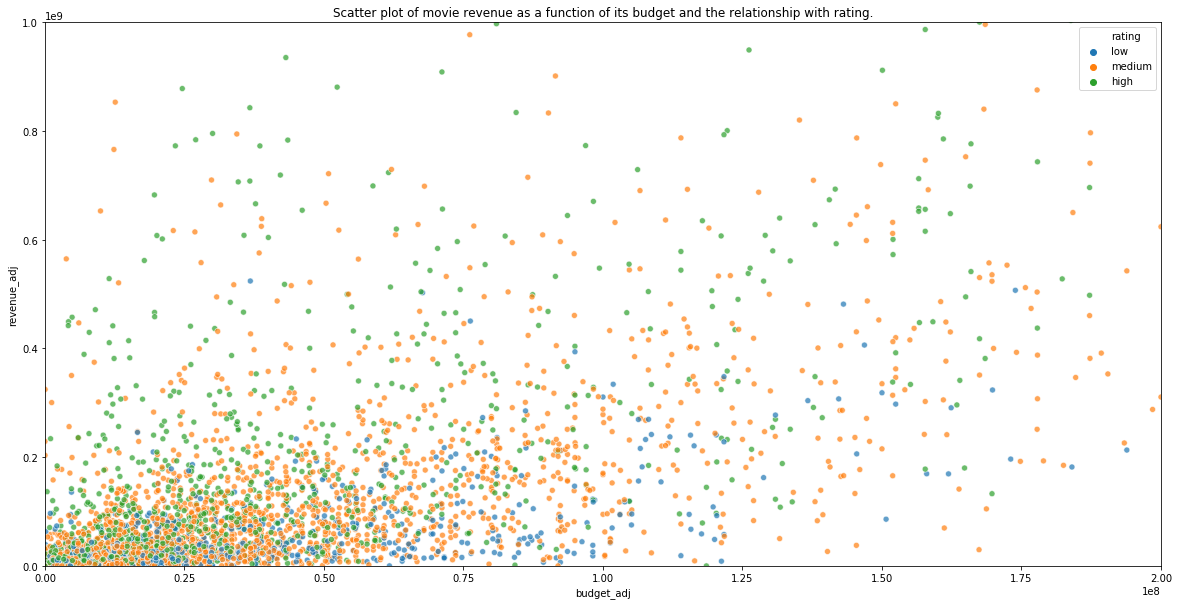

In [37]:
plt.figure(figsize = (20, 10))

# create the scatter plot
ax = sns.scatterplot(x = 'budget_adj', y = 'revenue_adj', hue = 'rating', alpha = 0.7,
                     data = tmdb_df)

# set some aesthetic parameters
ax.set_title("Scatter plot of movie revenue as a function of its budget and the relationship with rating.")
ax.set_xlim(0,2e8)
ax.set_ylim(0,1e9)

plt.show()

We notice from the above figure that there is some positive correlation between revenue and raing. On the other hand, the correlation between rating and budget is very weak.

This makes sense since more popular movies might get more cinema visite and sell more tickets. However, the budget does not affect popularity since small movie producers are capable of producing great movies too.



### Were there any interesting or surprising interactions between features?

The most interesting observation in my opinion is the fact the movie budgets has little effect on their ratings and popularity. This is a great observation that should give more hope to smaller movie producer and amateurs.